In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split

## **User Defined Functions**

### **Non-Lambda Functions**

In [3]:
def token_count(text):
    result_dict = tokenizer(text, padding=False, truncation=False)
    return len(result_dict['input_ids'])

### **Lambda Functions**

In [4]:
whitespace_split_n_count_tokens = lambda x : len(x.split(' '))

In [5]:
polarity_label = lambda x: 'positive' if x == 1 else 'negative'

## **Load Yelp Dataset from Hugging Face Hub**

In [2]:
yelp = load_dataset("fancyzhx/yelp_polarity")
yelp

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 38000
    })
})

In [6]:
yelp.set_format(type='pandas')
yelp_train = yelp['train'][:]
yelp_test = yelp['test'][:]

In [7]:
yelp_train['polarity_label'] = yelp_train['label'].apply(polarity_label)
yelp_train.head()

,text,label,polarity_label
0,"Unfortunately, the frustration of being Dr. Go...",0,negative
1,Been going to Dr. Goldberg for over 10 years. ...,1,positive
2,I don't know what Dr. Goldberg was like before...,0,negative
3,I'm writing this review to give you a heads up...,0,negative
4,All the food is great here. But the best thing...,1,positive


In [8]:
yelp_test['polarity_label'] = yelp_test['label'].apply(polarity_label)
yelp_test.head()

,text,label,polarity_label
0,"Contrary to other reviews, I have zero complai...",1,positive
1,Last summer I had an appointment to get new ti...,0,negative
2,"Friendly staff, same starbucks fair you get an...",1,positive
3,The food is good. Unfortunately the service is...,0,negative
4,Even when we didn't have a car Filene's Baseme...,1,positive


In [9]:
yelp_train.polarity_label.value_counts()

polarity_label
negative    280000
positive    280000
Name: count, dtype: int64

In [10]:
yelp_test.polarity_label.value_counts()

polarity_label
positive    19000
negative    19000
Name: count, dtype: int64

## **Token Count Analysis**

### **Tokenize Reviews by Whitespace**

In [12]:
yelp_train['approx_token_count'] = yelp_train['text'].apply(whitespace_split_n_count_tokens)
yelp_train.head()

,text,label,polarity_label,approx_token_count
0,"Unfortunately, the frustration of being Dr. Go...",0,negative,122
1,Been going to Dr. Goldberg for over 10 years. ...,1,positive,97
2,I don't know what Dr. Goldberg was like before...,0,negative,212
3,I'm writing this review to give you a heads up...,0,negative,193
4,All the food is great here. But the best thing...,1,positive,80


In [13]:
yelp_test['approx_token_count'] = yelp_test['text'].apply(whitespace_split_n_count_tokens)
yelp_test.head()

,text,label,polarity_label,approx_token_count
0,"Contrary to other reviews, I have zero complai...",1,positive,126
1,Last summer I had an appointment to get new ti...,0,negative,72
2,"Friendly staff, same starbucks fair you get an...",1,positive,16
3,The food is good. Unfortunately the service is...,0,negative,53
4,Even when we didn't have a car Filene's Baseme...,1,positive,138


#### **Full Train Split**

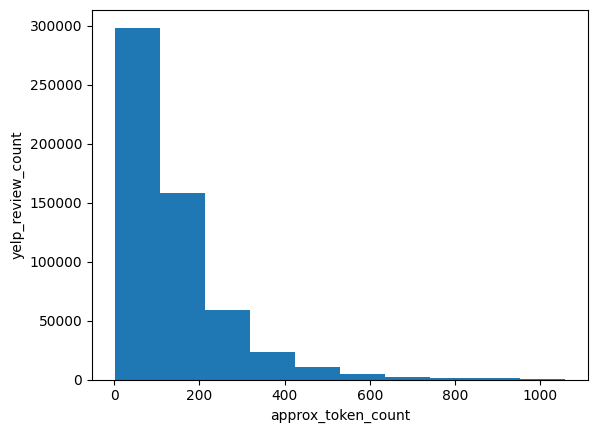

In [15]:
plt.hist(yelp_train['approx_token_count'])
plt.xlabel('approx_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Train Split - Negative Reviews**

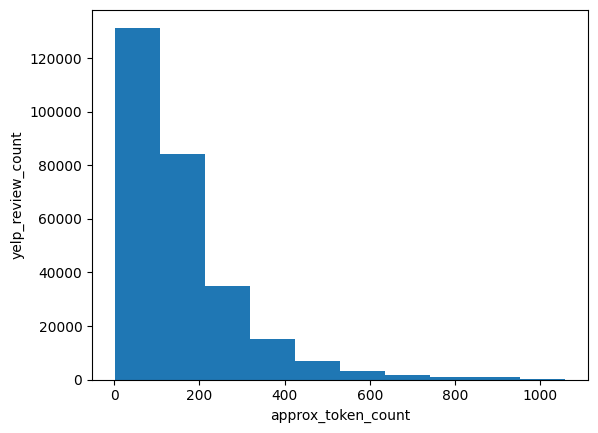

In [16]:
plt.hist(yelp_train[yelp_train['polarity_label']=='negative']['approx_token_count'])
plt.xlabel('approx_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Train Split - Positive Reviews**

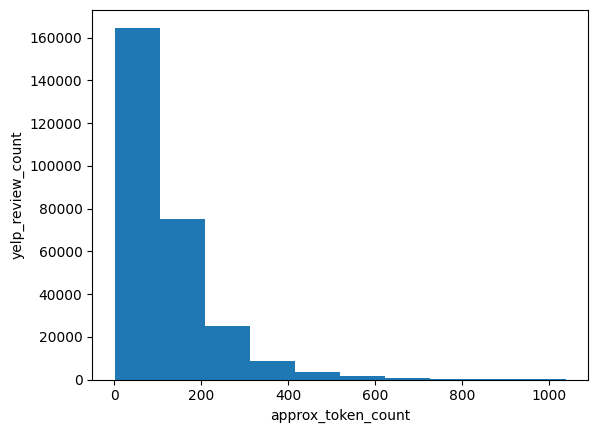

In [17]:
plt.hist(yelp_train[yelp_train['polarity_label']=='positive']['approx_token_count'])
plt.xlabel('approx_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Full Test Split**

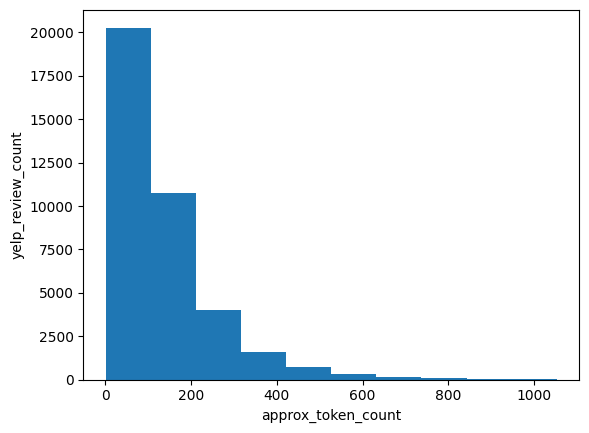

In [18]:
plt.hist(yelp_test['approx_token_count'])
plt.xlabel('approx_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Test Split - Negative Reviews**

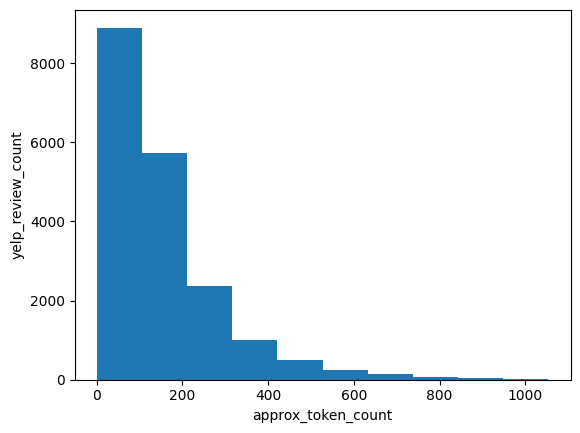

In [20]:
plt.hist(yelp_test[yelp_test['polarity_label']=='negative']['approx_token_count'])
plt.xlabel('approx_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Test Split - Positive Reviews**

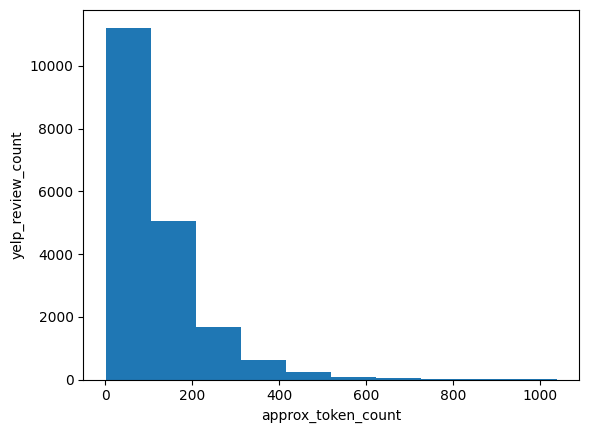

In [21]:
plt.hist(yelp_test[yelp_test['polarity_label']=='positive']['approx_token_count'])
plt.xlabel('approx_token_count')
plt.ylabel('yelp_review_count')
plt.show()

### **Tokenize Reviews with DistilBERT**

In [22]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [23]:
yelp_train['distil_bert_token_count'] = yelp_train['text'].apply(token_count)
yelp_test['distil_bert_token_count'] = yelp_test['text'].apply(token_count)

Token indices sequence length is longer than the specified maximum sequence length for this model (1019 > 512). Running this sequence through the model will result in indexing errors


In [24]:
yelp_train.head()

,text,label,polarity_label,approx_token_count,distil_bert_token_count
0,"Unfortunately, the frustration of being Dr. Go...",0,negative,122,150
1,Been going to Dr. Goldberg for over 10 years. ...,1,positive,97,120
2,I don't know what Dr. Goldberg was like before...,0,negative,212,251
3,I'm writing this review to give you a heads up...,0,negative,193,251
4,All the food is great here. But the best thing...,1,positive,80,118


In [25]:
yelp_test.head()

,text,label,polarity_label,approx_token_count,distil_bert_token_count
0,"Contrary to other reviews, I have zero complai...",1,positive,126,150
1,Last summer I had an appointment to get new ti...,0,negative,72,102
2,"Friendly staff, same starbucks fair you get an...",1,positive,16,20
3,The food is good. Unfortunately the service is...,0,negative,53,63
4,Even when we didn't have a car Filene's Baseme...,1,positive,138,190


#### **Full Train Split**

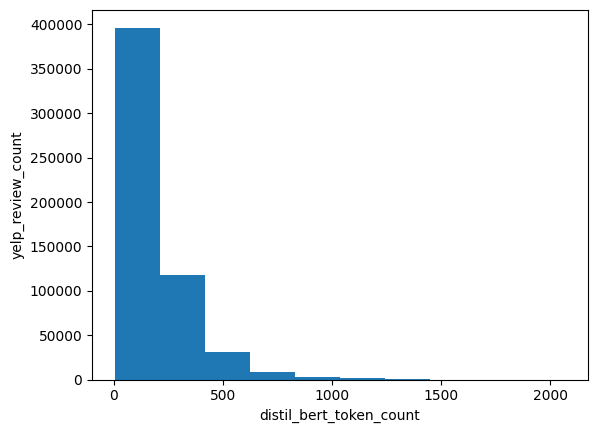

In [26]:
plt.hist(yelp_train['distil_bert_token_count'])
plt.xlabel('distil_bert_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Train Split - Negative Reviews**

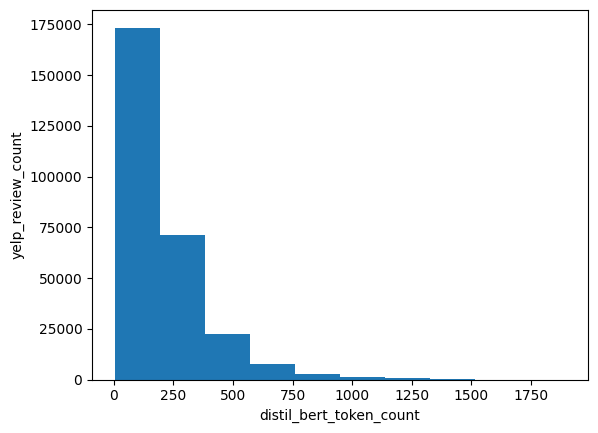

In [27]:
plt.hist(yelp_train[yelp_train['polarity_label']=='negative']['distil_bert_token_count'])
plt.xlabel('distil_bert_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Train Split - Positive Reviews**

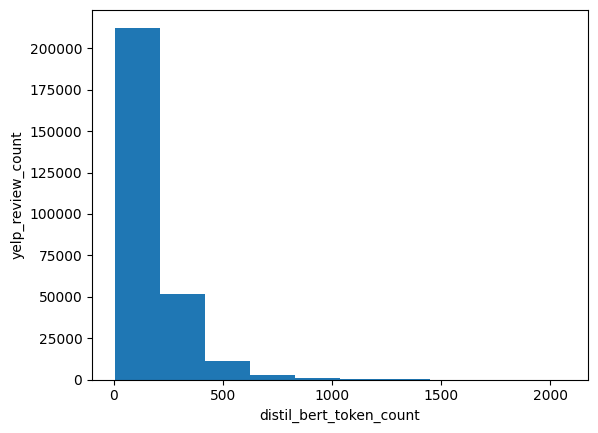

In [28]:
plt.hist(yelp_train[yelp_train['polarity_label']=='positive']['distil_bert_token_count'])
plt.xlabel('distil_bert_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Test Split - Negative Reviews**

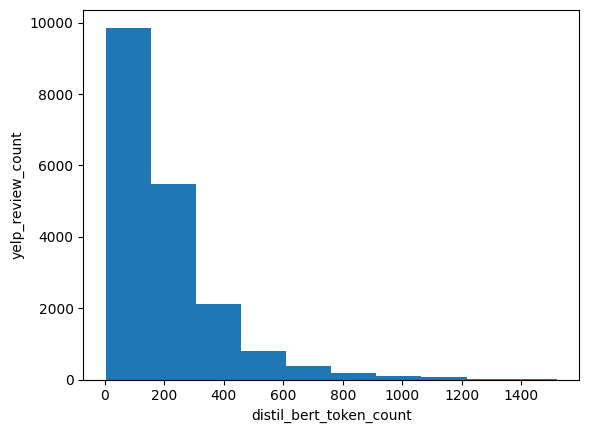

In [29]:
plt.hist(yelp_test[yelp_test['polarity_label']=='negative']['distil_bert_token_count'])
plt.xlabel('distil_bert_token_count')
plt.ylabel('yelp_review_count')
plt.show()

#### **Test Split - Positive Reviews**

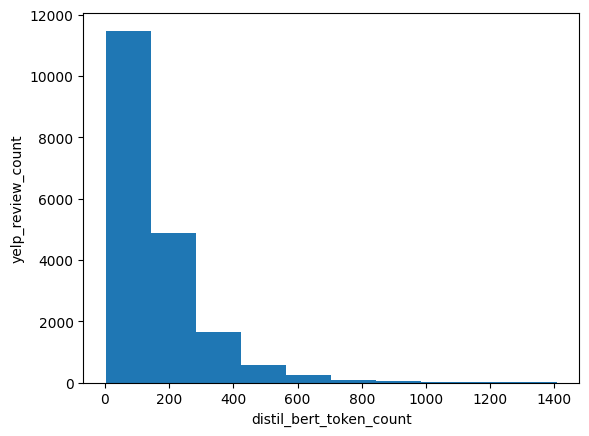

In [30]:
plt.hist(yelp_test[yelp_test['polarity_label']=='positive']['distil_bert_token_count'])
plt.xlabel('distil_bert_token_count')
plt.ylabel('yelp_review_count')
plt.show()

## **Drop Rows with Tokens > 512**

In [31]:
yelp_train_512 = yelp_train[yelp_train['distil_bert_token_count'] <= 512]
print(yelp_train.shape)
print(yelp_train_512.shape)

(560000, 5)
(533594, 5)


In [35]:
yelp_train_512['polarity_label'].value_counts()/yelp_train_512.shape[0] * 100.0

polarity_label
positive    50.826471
negative    49.173529
Name: count, dtype: float64

In [36]:
yelp_test_512 = yelp_test[yelp_test['distil_bert_token_count'] <= 512]
print(yelp_test.shape)
print(yelp_test_512.shape)

(38000, 5)
(36234, 5)


In [37]:
yelp_test_512['polarity_label'].value_counts()/yelp_test_512.shape[0] * 100.0

polarity_label
positive    50.85003
negative    49.14997
Name: count, dtype: float64

## **Create Train, Test and Validation Splits**

In [41]:
yelp_512 = pd.concat([yelp_train_512, yelp_test_512])

X = yelp_512[['text','polarity_label']].copy()
y = yelp_512['label']

In [42]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=1610, stratify=y)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.20, random_state=1610, stratify=y_train_temp)

In [44]:
X_train['label'] = y_train
X_test['label'] = y_test
X_val['label'] = y_val

In [45]:
X_train.polarity_label.value_counts()

polarity_label
positive    185364
negative    179325
Name: count, dtype: int64

In [46]:
X_test.polarity_label.value_counts()

polarity_label
positive    57927
negative    56039
Name: count, dtype: int64

In [47]:
X_val.polarity_label.value_counts()

polarity_label
positive    46341
negative    44832
Name: count, dtype: int64

In [49]:
train_data_csv = os.path.join(os.getcwd(),'data','yelp_train.csv')
test_data_csv = os.path.join(os.getcwd(),'data','yelp_test.csv')
valid_data_csv = os.path.join(os.getcwd(),'data','yelp_validation.csv')

X_train.to_csv(train_data_csv, index=False)
X_test.to_csv(test_data_csv, index=False)
X_val.to_csv(valid_data_csv, index=False)

In [52]:
X_val.head()

,text,polarity_label,label
107863,One of the best beer selections in the city. T...,positive,1
86668,Food was not very good. Service was subpar. 4 ...,negative,0
551149,Always has great lunch specials.. Back rubs wi...,positive,1
408949,Ever want to step inside a postcard picture an...,positive,1
514015,It was good. Cool stuff on the wall. I think t...,positive,1
